In [11]:
from SeismicReduction import *
import pickle
import torch.nn as nn

# load data
file_pi2 = open('./pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [12]:
### Processor
processor = Processor(dataholder)
input1 = processor(flatten=[True, 12, 52], normalise=True)

Processor has created an output with shape:  (25351, 2, 64)


In [13]:
vae = VaeModel(input1)
umap = UmapModel(input1)

ModelAgent initialised
ModelAgent initialised


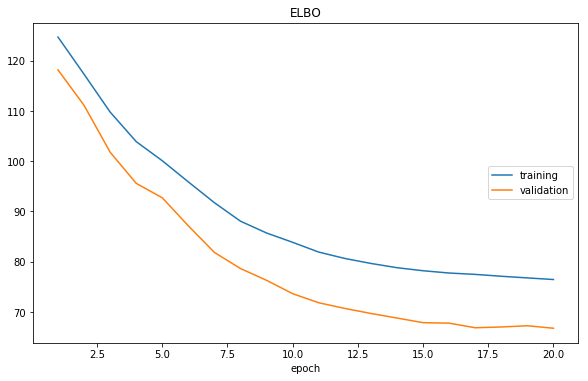

ELBO:
training   (min:   76.473, max:  124.680, cur:   76.473)
validation (min:   66.786, max:  118.158, cur:   66.786)


In [14]:
vae.reduce(epochs=20, hidden_size=32, lr=0.0005, plot_loss=True)
umap.reduce()

# Run UMAP params:

In [8]:
import copy

neighbours = [4, 5, 6, 8, 10, 50, 100]
dists = [0.0001, 0.01, 1]

# neighbours = [4, 10] #50, 100]
# dists = [0.0001, 0.001] #, 0.01, 0.2]

models = [[i for i in range(len(dists))] for i in range(len(neighbours))]

for i in range(len(neighbours)):
    for j in range(len(dists)):
#         vae.to_2d(umap_neighbours=neighbours[i], umap_dist=dists[j])
        umap.to_2d(umap_neighbours=neighbours[i], umap_dist=dists[j])
        models[i][j] = copy.deepcopy(umap)
        print(i, j)
        



2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 1

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 2

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

1 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

1 1

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

1 2

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

2 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

2 1

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

2 2

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

3 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


# Run plots

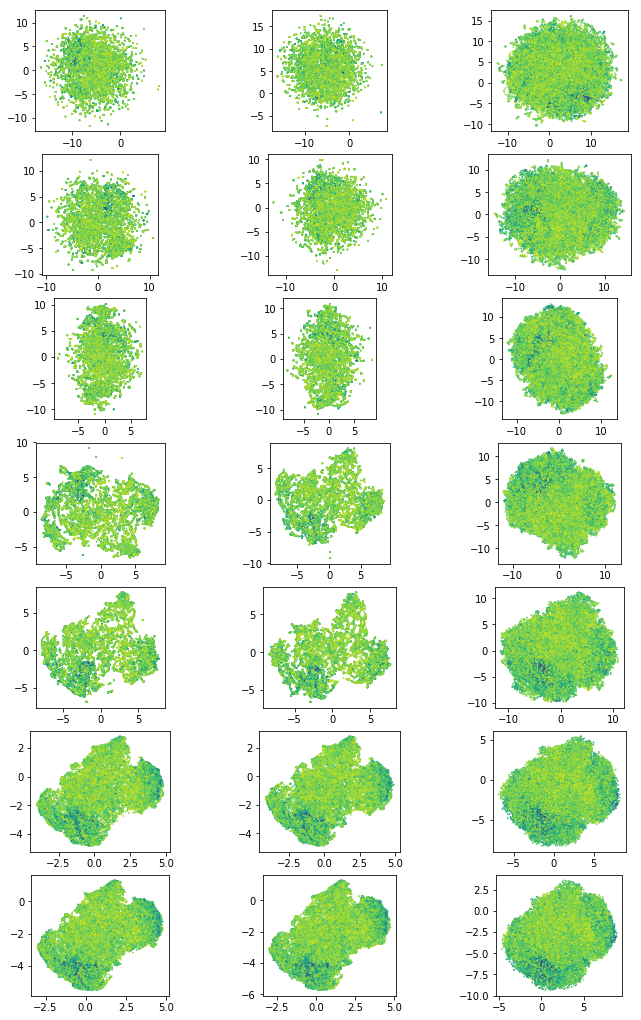

In [9]:
def plot_agent(model, attr='FF', ax=False):
    ax.set(
#         title='Model used: {}, Trace Attribute: {}'.format(
#                model.name, attr),
            aspect='equal') #, xlim=(-15,15), ylim=(-15,15))
        
    scatter = ax.scatter(model.two_dimensions[:, 0],
                         model.two_dimensions[:, 1],
                         s=0.5,
                         c=model.attributes[attr])
    return


# axes are in a two-dimensional array, indexed by [row, col]
fig, ax = plt.subplots(len(neighbours), len(dists), figsize=(8.27*1.2, 11.69*1.2))

# fig.suptitle('UMAP parameter investigation')

for i in range(len(neighbours)):
    for j in range(len(dists)):
        plot_agent(model=models[i][j], ax=ax[i, j])
    
fig.tight_layout(pad=0.2)
plt.show()

In [10]:
fig.savefig('./images/umap_param.png', quality=95, papertype='a4', edgecolor='black', facecolor='lightgrey')

In [15]:
import copy

neighbours = [4, 5, 6, 8, 10, 50, 100]
dists = [0.0001, 0.01, 1]

# neighbours = [4, 10] #50, 100]
# dists = [0.0001, 0.001] #, 0.01, 0.2]

models = [[i for i in range(len(dists))] for i in range(len(neighbours))]

for i in range(len(neighbours)):
    for j in range(len(dists)):
        vae.to_2d(umap_neighbours=neighbours[i], umap_dist=dists[j])
#         umap.to_2d(umap_neighbours=neighbours[i], umap_dist=dists[j])
        models[i][j] = copy.deepcopy(vae)
        print(i, j)
        


2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 0

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 1

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP representation complete

0 2

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP representation complete

1 0

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP representation complete

1 1

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP representation complete

1 2

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP representation complete

2 0

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP representation complete

2 1

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP representation complete

2 2

2D UMAP representation of VAE embedding initialised:
	Input dimension: (25351, 32)
	2-D UMAP repres

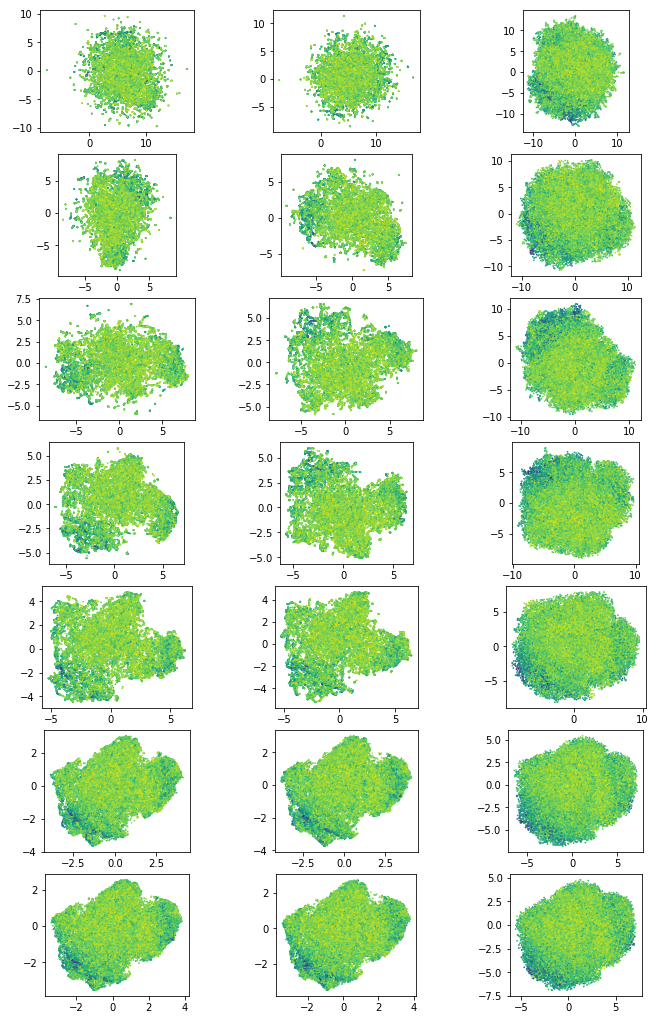

In [16]:
def plot_agent(model, attr='FF', ax=False):
    ax.set(
#         title='Model used: {}, Trace Attribute: {}'.format(
#                model.name, attr),
            aspect='equal') #, xlim=(-15,15), ylim=(-15,15))
        
    scatter = ax.scatter(model.two_dimensions[:, 0],
                         model.two_dimensions[:, 1],
                         s=0.5,
                         c=model.attributes[attr])
    return


# axes are in a two-dimensional array, indexed by [row, col]
fig, ax = plt.subplots(len(neighbours), len(dists), figsize=(8.27*1.2, 11.69*1.2))

# fig.suptitle('UMAP parameter investigation')

for i in range(len(neighbours)):
    for j in range(len(dists)):
        plot_agent(model=models[i][j], ax=ax[i, j])
    
fig.tight_layout(pad=0.2)
plt.show()

In [17]:
fig.savefig('./images/umap_param.png', quality=95, papertype='a4', edgecolor='black', facecolor='lightgrey')